In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import sqlalchemy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, make_pipeline
import spacy
import nltk
from nltk.corpus import stopwords
from langdetect import detect, DetectorFactory, detect_langs
import warnings
from collections import Counter
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
import pickle
from joblib import dump, load
import scikitplot as skplt
from matplotlib.colors import ListedColormap
import sklearn.metrics as metrics
# import psycopg2
# import json
# import dask.dataframe as dd

In [2]:
db_user = 'mymacbookpro'
db_password = ''
db_host = 'localhost'
db_port = 5432
database = 'mymacbookpro'

conn_postgres = f'postgres://{db_user}:{db_password}@{db_host}:{db_port}'

In [3]:
# create an sqlalchemy connection
engine = sqlalchemy.engine.create_engine(conn_postgres)
# connect using sqlalchemy
connection = engine.connect()

---

### Load business data

In [ ]:
# read in as lines=True, since it is a json each line will be read in as an individual json
biz = pd.read_json("/Users/mymacbookpro/Desktop/Datasets_Captstone/yelp_dataset (1)/yelp_academic_dataset_business.json", lines=True)

In [ ]:
biz.head(3)

In [ ]:
biz.shape

In [ ]:
biz.dtypes

In [ ]:
#for storing in postgres (text as string, not object)
biz['business_id'] = biz['business_id'].astype('str')
biz['attributes'] = biz['attributes'].astype('str')
biz['categories'] = biz['categories'].astype('str')
biz['hours'] = biz['hours'].astype('str')

In [ ]:
biz.to_sql(name='yelp_business', con=engine, if_exists = 'replace', index=False)
connection.execute('commit') #save data to sql

---

### Load tips data

In [ ]:
tip = pd.read_json("/Users/mymacbookpro/Desktop/Datasets_Captstone/yelp_dataset (1)/yelp_academic_dataset_tip.json", lines=True)

In [ ]:
tip.head(3)

In [ ]:
tip.shape

In [ ]:
tip.dtypes

In [ ]:
tip['business_id'] = tip['business_id'].astype('str')
tip['user_id'] = tip['user_id'].astype('str')

In [ ]:
tip.to_sql(name='yelp_tips', con=engine, if_exists = 'replace', index=False)
connection.execute('commit')

---

### Load check-in data

In [ ]:
check_in = pd.read_json("/Users/mymacbookpro/Desktop/Datasets_Captstone/yelp_dataset (1)/yelp_academic_dataset_checkin.json", lines=True)

In [ ]:
check_in.head(3)

In [ ]:
check_in.shape

In [ ]:
check_in.dtypes

In [ ]:
check_in['business_id'] = check_in['business_id'].astype('str')
check_in['date'] = check_in['date'].astype('str')

In [ ]:
check_in.to_sql(name='yelp_check_ins', con=engine, if_exists = 'replace', index=False)
connection.execute('commit')

---

### Load user data

In [ ]:
user_files = ['xab', 'xac', 'xad', 'xae', 'xaf', 'xag', 'xah', 'xai', 'xaj']

In [ ]:
users = pd.read_json("/Users/mymacbookpro/Desktop/Datasets_Captstone/yelp_dataset (1)/xaa", lines=True)

In [ ]:
users.head(3)

In [ ]:
users.shape

In [ ]:
users.dtypes

In [ ]:
users['user_id'] = users['user_id'].astype('str')
users['elite'] = users['elite'].astype('str')
users['friends'] = users['friends'].astype('str')

In [ ]:
users.to_sql(name='yelp_users', con=engine, if_exists = 'replace', index=False)
connection.execute('commit')

In [ ]:
for file in tqdm(user_files):
    path = "/Users/mymacbookpro/Desktop/Datasets_Captstone/yelp_dataset (1)/" + file
    users = pd.read_json(path, lines=True)
    
    users['user_id'] = users['user_id'].astype('str')
    users['elite'] = users['elite'].astype('str')
    users['friends'] = users['friends'].astype('str')
    
    users.to_sql(name='yelp_users', con=engine, if_exists = 'append', index=False)
    connection.execute('commit')


---

### Load review data

In [ ]:
review_files = ['xab', 'xac', 'xad', 'xae', 'xaf', 'xag', 'xah', 'xai', 'xaj', 'xak', 'xal', 'xam', 'xan', 'xao', 'xap', 'xaq', 'xar', 'xas', 'xat']

In [ ]:
reviews = pd.read_json("/Users/mymacbookpro/Desktop/Datasets_Captstone/yelp_dataset/review/xaa", lines=True)

In [ ]:
reviews['review_id'] = reviews['review_id'].astype('str')
reviews['user_id'] = reviews['user_id'].astype('str')
reviews['business_id'] = reviews['business_id'].astype('str')

In [ ]:
reviews.to_sql(name='yelp_reviews', con=engine, if_exists = 'replace', index=False)
connection.execute('commit')

In [ ]:
for file in tqdm(review_files):
    path = "/Users/mymacbookpro/Desktop/Datasets_Captstone/yelp_dataset/review/" + file
    reviews = pd.read_json(path, lines=True)
    
    reviews['review_id'] = reviews['review_id'].astype('str')
    reviews['user_id'] = reviews['user_id'].astype('str')
    reviews['business_id'] = reviews['business_id'].astype('str')

    reviews.to_sql(name='yelp_reviews', con=engine, if_exists = 'append', index=False)
    connection.execute('commit')

---

### Read data from Postgres

In [1]:
data = pd.read_sql(sql='yelp_reviews', con=engine)

NameError: name 'pd' is not defined

In [2]:
data.head()

NameError: name 'data' is not defined

In [6]:
data.shape

(8021122, 9)

In [7]:
data.text.dtype

dtype('O')

---

### Check the language of reviews

In [13]:
# Lang detect code to identify the different languages and then creating a SQL table and appending the results.
for data in tqdm(pd.read_sql(sql='SELECT review_id, text FROM yelp_reviews_filtered', con=engine, chunksize=5000)):
    langs = []
    detected_langs = []
    for idx, row in data.iterrows():
        try:
            langs.append(detect(row['text']))
            detected_langs.append(str(detect_langs(row['text'])))
        except:
            langs.append('fail')
            detected_langs.append('fail')
            continue
    lang = pd.DataFrame({'review_id': data['review_id'], 'lang': langs, 'detected_lang': detected_langs})
    lang.to_sql(name='yelp_reviews_lang', con=engine, if_exists ='append', index=False) 
    connection.execute('commit')

1605it [25:30:27, 57.21s/it]


In [4]:
def Q(query, con=connection):
    return pd.read_sql(query, con) # database connection

In [7]:
search_en_langs = Q('''SELECT COUNT(lang)
FROM yelp_reviews_lang
WHERE lang = 'en'
''')

search_en_langs

,count
0,7981962


In [8]:
all_langs = Q('''SELECT COUNT(*) 
FROM yelp_reviews_lang''')

print('% of English Language reviews for all businesses: 0.99%')
search_en_langs / all_langs 

% of English Language reviews for all businesses: 0.99%


,count
0,0.995118


## Check for the proportion of 'useful' reviews

> Looks like only 20% of reviews are classed as funny. So, this means that my dataset is imbalanced. I would need a test and CV score over 80% to mean that it is better than than baseline at predicting. This will involve different sampling techniques, which I will explore later.

In [9]:
useful = Q('''SELECT COUNT(useful) 
FROM yelp_reviews_filtered
WHERE useful > 0''')

useful / search_en_langs

,count
0,0.461505


## SQL join for reviews in English

In [5]:
# Create join table in SQL and drop reviews that are not english
connection.execute('''
CREATE TABLE reviews_join_table AS
SELECT yelp_reviews_filtered.review_id, yelp_reviews_lang.lang, yelp_reviews_lang.detected_lang, yelp_reviews_filtered.business_id, yelp_reviews_filtered.useful, yelp_reviews_filtered.cool, yelp_reviews_filtered.funny, yelp_reviews_filtered.text, yelp_reviews_filtered.review_year, yelp_reviews_filtered.review_month, yelp_reviews_filtered.review_day, yelp_reviews_filtered.stars
FROM yelp_reviews_lang
FULL JOIN yelp_reviews_filtered
ON yelp_reviews_lang.review_id = yelp_reviews_filtered.review_id
WHERE lang = 'en'
''')

In [97]:
connection.execute('''
CREATE TABLE reviews_table AS
SELECT yelp_business.city, yelp_business.name, yelp_business.state, reviews_join_table.review_id, reviews_join_table.lang, reviews_join_table.detected_lang, reviews_join_table.business_id, reviews_join_table.useful, reviews_join_table.cool, reviews_join_table.funny, reviews_join_table.text, reviews_join_table.review_year, reviews_join_table.review_month, reviews_join_table.review_day, reviews_join_table.stars
FROM yelp_business
FULL JOIN reviews_join_table
ON yelp_business.business_id = reviews_join_table.business_id''')

In [32]:
# Checking for duplicates. There are 7981962 after removing not english reviews.
unique_reviews = Q('''SELECT COUNT (DISTINCT review_id) AS unique_reviews
FROM reviews_table''')
unique_reviews

,unique_reviews
0,7981962


In [50]:
testing123 = Q('''SELECT stars, funny, city
FROM reviews_table
WHERE funny > 0 AND stars = 1
''')

testing123

,stars,funny,city
0,1,5,Las Vegas
1,1,1,Calgary
2,1,1,Las Vegas
3,1,1,Las Vegas
4,1,1,Peoria
...,...,...,...
331365,1,1,Tempe
331366,1,1,Las Vegas
331367,1,4,Pittsburgh
331368,1,1,Las Vegas


In [54]:
testing1234 = Q('''SELECT stars, funny, city
FROM reviews_table
WHERE funny = 0 AND stars = 1
''')

testing1234

,stars,funny,city
0,1,0,Goodyear
1,1,0,Plum
2,1,0,Las Vegas
3,1,0,Las Vegas
4,1,0,Las Vegas
...,...,...,...
949133,1,0,Chardon
949134,1,0,Phoenix
949135,1,0,Las Vegas
949136,1,0,Champaign


In [39]:
331370/949138

0.3491273134149091

## EDA 

In [75]:
sum_of_reviews = Q('''SELECT COUNT(CASE WHEN funny > 0 THEN 1 END) AS funny_reviews, 
COUNT(CASE WHEN useful > 0 THEN 1 END) AS useful_reviews, 
COUNT(CASE WHEN cool > 0 THEN 1 END) AS cool_reviews,
COUNT(review_id) AS unique_reivews
FROM reviews_table''')
sum_of_reviews

,funny_reviews,useful_reviews,cool_reviews,unique_reivews
0,1596224,3666780,1952798,7981962


In [6]:
#Not useful review
(7981962-3666780)/7981962

0.5406167055167639

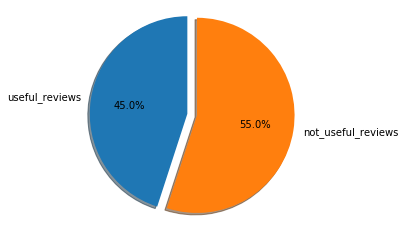

In [7]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'useful_reviews', 'not_useful_reviews'
sizes = [45, 55]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

_______________

In [6]:
# Check length of reviews and remove those with fewer characters than 500 (they may not add much value to the modelling)
check_len = Q('''SELECT *
FROM reviews_table
WHERE LENGTH(text) < 500
''')

check_len

,city,name,state,review_id,lang,detected_lang,business_id,useful,cool,funny,text,review_year,review_month,review_day,stars
0,Goodyear,Mimi's Bistro + Bakery,AZ,HPrzObG_TLsNxhyQQKHEdg,en,[en:0.9999976607552573],_ZKsdEkQ5K_CUSBtahjFAA,0,0,0,"5 min wait to get in. No one at the front,plen...",2018,3,1,1
1,Phoenix,Lux Central,AZ,KfmpzkAFuYmNQe9QXoUBEg,en,[en:0.9999974509326275],OgJ0KxwJcJ9R5bUK0ixCbg,0,0,0,"This is a great little ""internet"" cafe/bar/res...",2015,12,29,5
2,Plum,Dunkin',PA,KoImaQDd6PMEBAkpNDIN-Q,en,[en:0.9999964398431094],1VABify4KTXMvGZ4qcUt_g,0,0,0,My daughters asked if I would like a latte fro...,2019,9,2,1
3,Las Vegas,KISS By Monster Mini Golf,NV,Blrd1HVo6YabEF0wwyKVEw,en,[en:0.9999966326955407],mG7w2Ro7kOnrYUYlVTYtvA,0,0,0,Good place to see a lot of KISS memorabilia an...,2012,11,14,2
4,Charlotte,Soho Bistro,NC,Je9XVJ0xy4JmytVSUzXeQQ,en,[en:0.9999961562495072],aqszoKRB4Ol9bpemt0_-GQ,1,0,0,It is my opinion there are no good Chinese res...,2012,9,17,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4639443,Las Vegas,Battlefield Vegas,NV,KyfrkJg0zWzlRaaciu5ubQ,en,[en:0.9999976034534022],qNGexUR4IG8eSfs7USrRtA,0,1,0,"Whatever a dictionary defines amazing as, that...",2015,9,1,5
4639444,Phoenix,Neighborhood Watch Security,AZ,z1fb_nj6ew1PeOUXSQ0ntw,en,[en:0.9999975919588864],pkSlgznMbyUG0GLbJvqqAQ,0,0,0,Company service is excellent. We have been wit...,2017,4,1,5
4639445,Las Vegas,Red Rock Casino Resort And Spa,NV,FwAkj5IWAcS5w5rBnH_nRg,en,[en:0.9999957693086401],RhEvP5flF6KoPriMHmVYGg,0,0,0,By far my favorite casino/hotel in Vegas. It h...,2015,12,19,5
4639446,Toronto,F'Amelia,ON,UHIL43Rd29foD7ggtQYDlw,en,[en:0.9999992066530292],MLQeuiL9rqOq_rDKGEcU0A,0,0,0,I has the opportunity to visit F'Amelia for th...,2015,9,16,5


In [13]:
check_len['text'][0]

"5 min wait to get in. No one at the front,plenty of open tables.Ten min to get a server,got our drinks,another ten min to order lunch 35 min to get our food, a salad and a turkey club. Bread was stale,fries were cold and soggy. My wife's salad was ok,nothing to brag about. An other couple were displeased with their meal also, they left just as we got our meal, we should have left at that point.   I wouldn't recommend this place to anyone !"

In [26]:
# Sarcastic reviews check where voted as funny
business_with_most_reviews_where_funny = Q('''SELECT COUNT(review_id), name, state, stars, funny 
FROM reviews_table
WHERE stars = 1 AND funny > 0
GROUP BY name, state, stars, funny
ORDER BY count DESC
''')
business_with_most_reviews_where_funny

,count,name,state,stars,funny
0,545,McDonald's,AZ,1,1
1,513,Starbucks,NV,1,1
2,503,McDonald's,NV,1,1
3,436,Starbucks,AZ,1,1
4,289,Circus Circus Las Vegas Hotel and Casino,NV,1,1
...,...,...,...,...,...
130623,1,Brunswick Zone Glendale Lanes,AZ,1,1
130624,1,Brunswick Zone Glendale Lanes,AZ,1,2
130625,1,Brunswick Zone Glendale Lanes,AZ,1,6
130626,1,Brunswick Zone Kyrene Lanes,AZ,1,2


In [25]:
# Sarcastic reviews check where not voted as funny
business_with_most_reviews_where_funny_is_0 = Q('''SELECT COUNT(review_id), name, state, stars, funny 
FROM reviews_table
WHERE stars = 1 AND funny = 0
GROUP BY name, state, stars, funny
ORDER BY count DESC
''')
business_with_most_reviews_where_funny_is_0

,count,name,state,stars,funny
0,3739,McDonald's,AZ,1,0
1,2955,McDonald's,NV,1,0
2,2436,Starbucks,NV,1,0
3,2396,Starbucks,AZ,1,0
4,2135,Tropical Smoothie Cafe,NV,1,0
...,...,...,...,...,...
106354,1,Rôtisserie Charcos,QC,1,0
106355,1,South Euclid Dog Park,OH,1,0
106356,1,South Glenmore Park,AB,1,0
106357,1,Résidence Herron CHSLD,QC,1,0


In [30]:
business_with_most_reviews = Q('''SELECT COUNT(review_id),name, city
FROM reviews_table
GROUP BY name, city
ORDER BY count DESC
''')
business_with_most_reviews

,count,name,city
0,12188,Hash House A Go Go,Las Vegas
1,10374,Bacchanal Buffet,Las Vegas
2,9485,Mon Ami Gabi,Las Vegas
3,8319,Starbucks,Las Vegas
4,7577,Wicked Spoon,Las Vegas
...,...,...,...
183801,0,Cervéjaria,Boucherville
183802,0,Cabine M,Dorval
183803,0,Brasserie Artisanale Albion,Joliette
183804,0,Belvédère,Westmount


In [41]:
business_with_most_reviews_where_useful = Q('''SELECT COUNT(review_id), name, useful, city
FROM reviews_table
WHERE useful > 0
GROUP BY name, useful, city
ORDER BY count DESC
''')
business_with_most_reviews_where_useful

,count,name,useful,city
0,2067,Hash House A Go Go,1,Las Vegas
1,1954,Bacchanal Buffet,1,Las Vegas
2,1712,Starbucks,1,Las Vegas
3,1640,Wicked Spoon,1,Las Vegas
4,1601,Mon Ami Gabi,1,Las Vegas
...,...,...,...,...
722568,1,Marché Bonsecours,25,Montréal
722569,1,Marché Branche d'Olivier,4,Montréal
722570,1,Marché Branche d'Olivier,4,Verdun
722571,1,Marché Branche d'Olivier,5,Verdun


In [42]:
business_with_most_reviews_where_useful_is_0 = Q('''SELECT COUNT(review_id), name, useful, city
FROM reviews_table
WHERE useful = 0
GROUP BY name, useful, city
ORDER BY count DESC
''')
business_with_most_reviews_where_useful_is_0

,count,name,useful,city
0,8555,Hash House A Go Go,0,Las Vegas
1,6619,Mon Ami Gabi,0,Las Vegas
2,6033,Bacchanal Buffet,0,Las Vegas
3,5101,Starbucks,0,Las Vegas
4,4378,Nacho Daddy,0,Las Vegas
...,...,...,...,...
171519,1,After Dark Tattoo,0,Tempe
171520,1,Bottom Dollar Food,0,Pittsburgh
171521,1,American Leadership Academy - Gilbert,0,Gilbert
171522,1,Afro-Latino Dance Company,0,Toronto


In [8]:
hash_house_a_go_go = Q('''SELECT *
FROM reviews_table
WHERE name = 'Hash House A Go Go'
''')
hash_house_a_go_go

,city,name,state,review_id,lang,detected_lang,business_id,useful,cool,funny,text,review_year,review_month,review_day,stars
0,Las Vegas,Hash House A Go Go,NV,ATBfVaNCL0ZPCwBFaxo4FQ,en,[en:0.9999972220368943],f4x1YBxkLrZg652xt2KR5g,0,0,0,Perfect hangover food.\nWe waited approximatel...,2012,8,12,4
1,Las Vegas,Hash House A Go Go,NV,-zlqBBszjl7ty5OAUTxMfg,en,[en:0.9999963443254882],g8OnV26ywJlZpezdBnOWUQ,0,0,0,Simple review...\n\nGood comfort food at desc...,2010,8,24,4
2,Las Vegas,Hash House A Go Go,NV,uKdZ4oo6ed7l70BSChVQ8g,en,[en:0.9999977361645049],g8OnV26ywJlZpezdBnOWUQ,0,0,0,Love the ambiance of the place. Fun and upbeat...,2011,5,21,3
3,Las Vegas,Hash House A Go Go,NV,NWmUs4ufj37CZunxtmIhZA,en,[en:0.9999972282654674],f4x1YBxkLrZg652xt2KR5g,0,0,0,We were in Vegas for a Family Vacation and we ...,2019,7,27,2
4,Las Vegas,Hash House A Go Go,NV,xu_SyV6pTv0I8g5SsZ7vng,en,[en:0.9999975755619838],g8OnV26ywJlZpezdBnOWUQ,0,0,0,"Like most folks, I saw the Man vs. Food specia...",2010,11,24,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13312,Las Vegas,Hash House A Go Go,NV,_9grPBHEVk5XYeOqfSi8kA,en,[en:0.9999965924086063],3ajqOW9A7VhResA08I7RTg,1,0,0,This was our second time to a Hash House a GoG...,2017,4,4,5
13313,Las Vegas,Hash House A Go Go,NV,5HAT4EIYo4DnLVw-yDvTpQ,en,[en:0.9999975981787255],3ajqOW9A7VhResA08I7RTg,0,0,0,Looked up this place and saw the pictures and ...,2017,9,5,1
13314,Las Vegas,Hash House A Go Go,NV,OpOCEBF-pXY6u8KEIFUDyQ,en,[en:0.9999970465960116],3ajqOW9A7VhResA08I7RTg,0,0,0,Come hungry. Huge portions.\n\nI found this on...,2013,1,28,5
13315,Las Vegas,Hash House A Go Go,NV,UcrgITz939do9YbjCum9Qw,en,[en:0.9999967965160932],3ajqOW9A7VhResA08I7RTg,0,0,0,Jon our Server gave EXCELLENT SERVICE. Great h...,2018,4,18,5


In [12]:
restaurant_with_the_most_reviews = Q('''SELECT COUNT(review_id), name
FROM reviews_table
GROUP BY name
ORDER BY COUNT(review_id) DESC
''')
restaurant_with_the_most_reviews

,count,name
0,29955,Starbucks
1,20298,McDonald's
2,13317,Hash House A Go Go
3,11419,Chipotle Mexican Grill
4,10374,Bacchanal Buffet
...,...,...
157224,0,La Brassée
157225,0,Z Chicha
157226,0,Zend'O
157227,0,altitude 737


In [14]:
city_with_most_business_reviews = Q('''SELECT COUNT(review_id), city
FROM reviews_table
GROUP BY city
ORDER BY COUNT(review_id) DESC
''')
city_with_most_business_reviews

,count,city
0,2439138,Las Vegas
1,875782,Phoenix
2,598681,Toronto
3,457331,Scottsdale
4,384472,Charlotte
...,...,...
1246,1,Belœil
1247,0,RŽpentigny
1248,0,Ange-Gardien
1249,0,Saint-Esprit


In [17]:
restaurants_in_las_vegas_with_most_reviews = Q('''SELECT COUNT(review_id), city, name
FROM reviews_table
WHERE city = 'Las Vegas'
GROUP BY name, city
ORDER BY COUNT(review_id) DESC
''')
restaurants_in_las_vegas_with_most_reviews

,count,city,name
0,12188,Las Vegas,Hash House A Go Go
1,10374,Las Vegas,Bacchanal Buffet
2,9485,Las Vegas,Mon Ami Gabi
3,8319,Las Vegas,Starbucks
4,7577,Las Vegas,Wicked Spoon
...,...,...,...
25915,2,Las Vegas,Rompe Tiquetes
25916,1,Las Vegas,La Onda Banquet Hall
25917,1,Las Vegas,El Arcoiris Beauty Salon
25918,1,Las Vegas,Americhoice Insurance


In [24]:
restaurants_with_1_star_reviews = Q('''SELECT COUNT(review_id), city, name, stars
FROM reviews_table
WHERE city = 'Las Vegas' AND stars = 1
GROUP BY name, city, stars
ORDER BY COUNT(review_id) DESC
''')
restaurants_with_1_star_reviews

,count,city,name,stars
0,2915,Las Vegas,McDonald's,1
1,2640,Las Vegas,Starbucks,1
2,1675,Las Vegas,Tropical Smoothie Cafe,1
3,1486,Las Vegas,Flamingo Las Vegas Hotel & Casino,1
4,1388,Las Vegas,Luxor Hotel and Casino Las Vegas,1
...,...,...,...,...
19761,1,Las Vegas,J & B Hauling,1
19762,1,Las Vegas,Korea Town Plaza Food Court,1
19763,1,Las Vegas,Athleta,1
19764,1,Las Vegas,Thunder Suds Laundromat & Dry Cleaners,1


In [23]:
restaurants_with_2_star_reviews = Q('''SELECT COUNT(review_id), city, name, stars
FROM reviews_table
WHERE city = 'Las Vegas' AND stars = 2
GROUP BY name, city, stars
ORDER BY COUNT(review_id) DESC
''')
restaurants_with_2_star_reviews

,count,city,name,stars
0,1135,Las Vegas,Starbucks,2
1,1083,Las Vegas,Hash House A Go Go,2
2,981,Las Vegas,Luxor Hotel and Casino Las Vegas,2
3,913,Las Vegas,Bacchanal Buffet,2
4,808,Las Vegas,Wicked Spoon,2
...,...,...,...,...
12432,1,Las Vegas,Sahara West Library & Fine Arts Museum,2
12433,1,Las Vegas,"David A Foggia, MD",2
12434,1,Las Vegas,David & Goliath,2
12435,1,Las Vegas,Davi's Pizza,2


In [27]:
restaurants_with_3_star_reviews = Q('''SELECT COUNT(review_id), city, name, stars
FROM reviews_table
WHERE city = 'Las Vegas' AND stars = 3
GROUP BY name, city, stars
ORDER BY COUNT(review_id) DESC
''')
restaurants_with_3_star_reviews

,count,city,name,stars
0,1747,Las Vegas,Hash House A Go Go,3
1,1557,Las Vegas,Bacchanal Buffet,3
2,1445,Las Vegas,Wicked Spoon,3
3,1185,Las Vegas,McCarran International Airport,3
4,1145,Las Vegas,Starbucks,3
...,...,...,...,...
12186,1,Las Vegas,Shi Beauty Parlor,3
12187,1,Las Vegas,"Donald W Tice, DO",3
12188,1,Las Vegas,Donald J Pliner,3
12189,1,Las Vegas,Dona Norma Restaurant,3


In [25]:
restaurants_with_4_star_reviews = Q('''SELECT COUNT(review_id), city, name, stars
FROM reviews_table
WHERE city = 'Las Vegas' AND stars = 4
GROUP BY name, city, stars
ORDER BY COUNT(review_id) DESC
''')
restaurants_with_4_star_reviews

,count,city,name,stars
0,3646,Las Vegas,Hash House A Go Go,4
1,3103,Las Vegas,Mon Ami Gabi,4
2,2626,Las Vegas,Bacchanal Buffet,4
3,2318,Las Vegas,Wicked Spoon,4
4,1919,Las Vegas,Earl of Sandwich,4
...,...,...,...,...
15668,1,Las Vegas,Disco Bus,4
15669,1,Las Vegas,Dis & Dat Auto Wrecking & U-Pull Auto Parts,4
15670,1,Las Vegas,Sting Alarm,4
15671,1,Las Vegas,Stinko's Las Vegas,4


In [26]:
restaurants_with_5_star_reviews = Q('''SELECT COUNT(review_id), city, name, stars
FROM reviews_table
WHERE city = 'Las Vegas' AND stars = 5
GROUP BY name, city, stars
ORDER BY COUNT(review_id) DESC
''')
restaurants_with_5_star_reviews

,count,city,name,stars
0,4805,Las Vegas,Hash House A Go Go,5
1,4474,Las Vegas,Mon Ami Gabi,5
2,4227,Las Vegas,Bacchanal Buffet,5
3,3621,Las Vegas,Egg Works,5
4,3473,Las Vegas,Nacho Daddy,5
...,...,...,...,...
24407,1,Las Vegas,Classic Furniture Consignment,5
24408,1,Las Vegas,J Cuts Style n Shave,5
24409,1,Las Vegas,UMC Wellness Center,5
24410,1,Las Vegas,J&S Automotive & Machine Shop,5


In [31]:
unique_businesses_per_city = Q('''SELECT DISTINCT name, city, COUNT(review_id)
FROM reviews_table
GROUP BY city, name
ORDER BY COUNT(review_id) DESC
''')
unique_businesses_per_city

,name,city,count
0,Hash House A Go Go,Las Vegas,12188
1,Bacchanal Buffet,Las Vegas,10374
2,Mon Ami Gabi,Las Vegas,9485
3,Starbucks,Las Vegas,8319
4,Wicked Spoon,Las Vegas,7577
...,...,...,...
183801,Walmart,Châteauguay,0
183802,Z Chicha,Montréal,0
183803,Zend'O,Boucherville,0
183804,altitude 737,Montréal,0


In [33]:
unique_businesses_in_reviews = Q('''SELECT DISTINCT name, COUNT(review_id)
FROM reviews_table
GROUP BY name
ORDER BY COUNT(review_id) DESC
''')
unique_businesses_in_reviews

,name,count
0,Starbucks,29955
1,McDonald's,20298
2,Hash House A Go Go,13317
3,Chipotle Mexican Grill,11419
4,Bacchanal Buffet,10374
...,...,...
157224,Vélo Montréal,0
157225,Z Chicha,0
157226,Zend'O,0
157227,altitude 737,0


In [42]:
count_of_reviews_on_length_for_hash_house = Q('''SELECT text, name
FROM reviews_table
WHERE LENGTH(text) > 75 AND name = 'Hash House A Go Go'
''')
count_of_reviews_on_length_for_hash_house

,text,name
0,Simple review...\n\nGood comfort food at desc...,Hash House A Go Go
1,Love the ambiance of the place. Fun and upbeat...,Hash House A Go Go
2,We were in Vegas for a Family Vacation and we ...,Hash House A Go Go
3,"Like most folks, I saw the Man vs. Food specia...",Hash House A Go Go
4,What a treat. You can find some good restaura...,Hash House A Go Go
...,...,...
13226,"If it were possible to have half a star, I wou...",Hash House A Go Go
13227,Come hungry. Huge portions.\n\nI found this on...,Hash House A Go Go
13228,While staying on Fremont I ate there last nigh...,Hash House A Go Go
13229,Jon our Server gave EXCELLENT SERVICE. Great h...,Hash House A Go Go


In [61]:
# Check length of reviews (including useful column) and create a hist plot
check_len = Q('''SELECT text, name, LENGTH(text) AS length, useful, city
FROM reviews_table
WHERE text != 'None'
''')

check_len

,text,name,length,useful,city
0,"5 min wait to get in. No one at the front,plen...",Mimi's Bistro + Bakery,443,0,Goodyear
1,"This is a great little ""internet"" cafe/bar/res...",Lux Central,212,0,Phoenix
2,My daughters asked if I would like a latte fro...,Dunkin',143,0,Plum
3,Dr. Neville Campbell was a much different pers...,Center For Wellness and Pain Care of Las Vegas,3032,10,Las Vegas
4,Good place to see a lot of KISS memorabilia an...,KISS By Monster Mini Golf,436,0,Las Vegas
...,...,...,...,...,...
7981957,Company service is excellent. We have been wit...,Neighborhood Watch Security,118,0,Phoenix
7981958,By far my favorite casino/hotel in Vegas. It h...,Red Rock Casino Resort And Spa,302,0,Las Vegas
7981959,The guys at Experimax are awesome!!! My 2015 M...,Experimax - Gilbert,1110,0,Gilbert
7981960,I has the opportunity to visit F'Amelia for th...,F'Amelia,294,0,Toronto


In [64]:
check_len.groupby(['name', 'city']).length.agg(['count', 'mean', 'min', 'max'])

,,count,mean,min,max
name,city,,,,
,Huntersville,3,604.666667,511,720
China,Rock Hill,10,318.600000,143,666
Fresh Madison Market,Madison,56,571.714286,51,3200
L & A Insurance Services,Phoenix,4,269.500000,62,515
"""T""s Hair Affair",Chandler,10,290.400000,123,538
...,...,...,...,...,...
Œuf et Bœuf,Montréal,11,449.090909,147,906
Œufs & Cie,Brossard,11,622.636364,118,1938
​Century Library,Phoenix,20,679.400000,131,2892


Text(0.5, 1.0, 'Text Length Distribution')

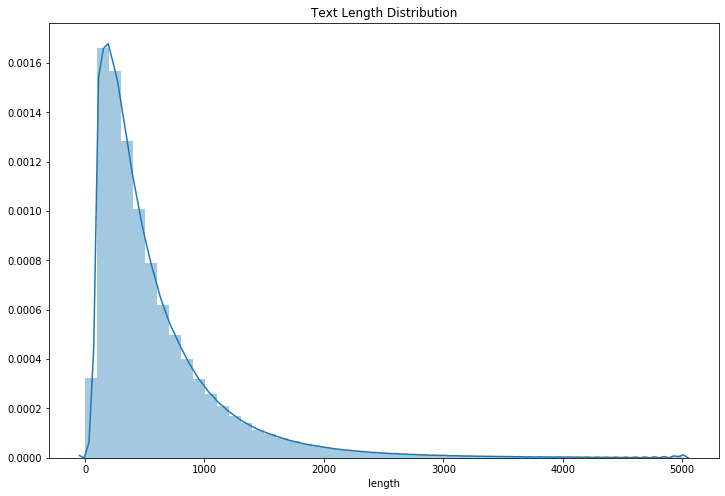

In [74]:
# Distribution of reviews
warnings.filterwarnings("ignore")
fig = plt.figure(figsize=(12,8))
sns.distplot(check_len['length'], kde=True, bins=50)
plt.title('Text Length Distribution')

In [59]:
check_len.describe()

,length
count,7.981962e+06
mean,5.924230e+02
std,5.602854e+02
min,3.000000e+00
25%,2.340000e+02
50%,4.180000e+02
75%,7.500000e+02
max,5.000000e+03


In [69]:
# Check length of reviews (where review is voted as useful) and create a hist plot
check_len_useful = Q('''SELECT text, name, LENGTH(text) AS length, useful, city
FROM reviews_table
WHERE text != 'None'
AND useful > 0
ORDER BY LENGTH(text) DESC
''')

check_len_useful

,text,name,length,useful,city
0,#1 i am not being repetitive. upon looking a...,Chamberlin + Associates,5000,1,Phoenix
1,Below is the exact email that I sent to Megan ...,Makeup In the 702,5000,25,Las Vegas
2,Thanks to UNLV I got the chance to go to LIB f...,Life is Beautiful Festival,5000,7,Las Vegas
3,"DO NOT LET THE NAME FOOL YOU: Kid friendly, c...",Cobra Kai Jiu-Jitsu,5000,10,Las Vegas
4,I have tried waiting more than two years befor...,Desert Hills Animal Clinic,5000,8,Phoenix
...,...,...,...,...,...
3666775,edited,Franktuary,6,1,Pittsburgh
3666776,Great,South Hills Chrysler Dodge Jeep Ram Fiat,5,2,McMurray
3666777,This,Ports O' Call Buffet,4,1,Las Vegas
3666778,Not,The Home Depot,3,1,Phoenix


Text(0.5, 1.0, 'Text Length Distribution')

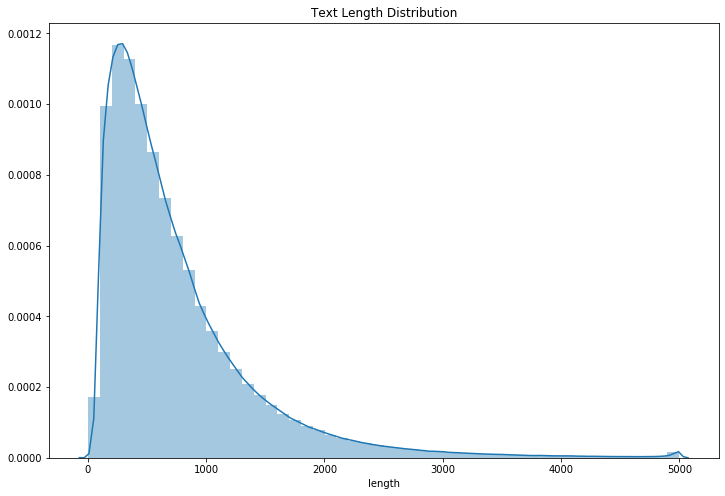

In [72]:
warnings.filterwarnings("ignore")
fig = plt.figure(figsize=(12,8))
sns.distplot(check_len_useful['length'], kde=True, bins=50)
plt.title('Text Length Distribution')

In [17]:
# Check length of reviews (where not useful) and create a hist plot
check_len_not_useful = Q('''SELECT text, name, LENGTH(text) AS length, useful, city
FROM reviews_table
WHERE text != 'None'
AND useful = 0
ORDER BY LENGTH(text) DESC
''')

check_len_not_useful

,text,name,length,useful,city
0,I went to the Palms Casino thru Bookit.com. M...,Palms Casino Resort,5000,0,Las Vegas
1,After fleeing a domestic violence situation my...,Comfort Inn & Suites at Talavi,5000,0,Glendale
2,Just came back from participating in the Event...,Modern Market Eatery,5000,0,Phoenix
3,*EDIT*\n This company is nothing but liars and...,All Bed Bugs Begone,5000,0,Phoenix
4,"I too used to think this was a ""good"" shop, wi...",Litchfield Auto Repair,5000,0,Goodyear
...,...,...,...,...,...
4315176,Awsome,Goodcents Deli Fresh Subs,6,0,Tempe
4315177,Great,Luxor Hotel and Casino Las Vegas,5,0,Las Vegas
4315178,Great,IHOP,5,0,Las Vegas
4315179,Cool,Q Bistro,4,0,Las Vegas


Text(0.5, 1.0, 'Text Length Distribution')

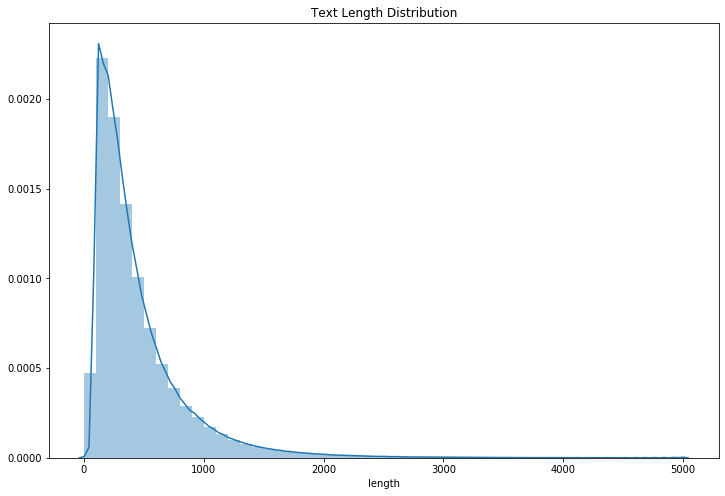

In [18]:
warnings.filterwarnings("ignore")
fig = plt.figure(figsize=(12,8))
sns.distplot(check_len_not_useful['length'], kde=True, bins=50)
plt.title('Text Length Distribution')

In [87]:
# Check length of reviews where text length is less than 50 where useful is 0
check_len_less_than_50 = Q('''SELECT text, name, LENGTH(text) AS length, useful, city
FROM reviews_table
WHERE text != 'None'
AND LENGTH(text) < 50
AND useful = 0
ORDER BY LENGTH(text) DESC
''')

check_len_less_than_50

,text,name,length,useful,city
0,Don't pass this place up. The food is fantastic!,Don Jose's,49,0,Sun City
1,I'm hooked on this pizza! Love it. Fast delivery.,Rosati's Pizza,49,0,Cave Creek
2,Pork Belly bowl will warm your belly. Ramen GOOD!,Monta Japanese Noodle House,49,0,Las Vegas
3,"Great pizza, excellent location in downtown Mesa.",Queens Pizzeria,49,0,Mesa
4,They did a good job and took care of all details.,"The Westin Kierland Villas, Scottsdale",49,0,Scottsdale
...,...,...,...,...,...
6204,Great!,La Casa Blanca,6,0,Chandler
6205,Great,IHOP,5,0,Las Vegas
6206,Great,Luxor Hotel and Casino Las Vegas,5,0,Las Vegas
6207,Cool,The Forum Shops at Caesars,4,0,Las Vegas


__________________

In [52]:
# Useful and not useful reviews for text length under 50
total_under_50 = '''SELECT text, name, LENGTH(text) AS length, useful, city, stars, cool, funny
FROM reviews_table
WHERE text != 'None'
AND LENGTH(text) < 50
ORDER BY LENGTH(text) DESC
'''

In [53]:
with pd.option_context('display.max_rows', None):
    df = pd.read_sql(total_under_50, con=connection)
    display(round(df.head(500),2)) 

,text,name,length,useful,city,stars,cool,funny
0,"Great place for Happy Hour, love their Mojitos!!!",Havana Grill,49,0,Las Vegas,4,0,0
1,"Great pizza, excellent location in downtown Mesa.",Queens Pizzeria,49,0,Mesa,4,0,0
2,Pork Belly bowl will warm your belly. Ramen GOOD!,Monta Japanese Noodle House,49,0,Las Vegas,4,0,0
3,Fun place to eat and drink after a Steelers game.,Southern Tier Brewery Pittsburgh,49,0,Pittsburgh,4,0,0
4,"Fresh food, great atmosphere, Excellent pastries!",Amélie's French Bakery & Café,49,0,Charlotte,5,0,0
5,Great club small but girls were nice will go back,Talk of the Town,49,0,Las Vegas,4,0,0
6,Great for a quick bite. It is also very spacious.,Nando's Flame Grilled Chicken,49,0,Toronto,5,0,0
7,"Great beer, good menu, and friendly service. Yum.",Gordon Biersch Brewery Restaurant,49,0,Gilbert,4,1,0
8,"very friendly staff, free vacuums, and convenient",Finish Line Car Wash,49,0,Solon,4,0,0
9,loved the filet mignon! so tender and juicy!!! :),Mon Ami Gabi,49,0,Las Vegas,4,0,0


___________________

### Correlation of variables including all text lengths

In [24]:
prep_for_corr_matrix = '''SELECT text, name, LENGTH(text) AS review_length, useful, city, stars, cool, funny
FROM reviews_table
WHERE text != 'None'
'''

In [25]:
with pd.option_context('display.max_rows', None):
    df2 = pd.read_sql(prep_for_corr_matrix, con=connection)
    display(round(df2.head(500),2)) #display(round(df.head(99),2))

,text,name,review_length,useful,city,stars,cool,funny
0,Absolutely horrible service at the bar. Never ...,N'awlins Jazz Bar & Dining,338,4,Toronto,1,0,2
1,The location is definitely easy to get to and ...,Saguaro Medical Weight Control,636,2,Mesa,5,0,0
2,I've been to this location a few times which w...,Yoshinoya,1041,4,Las Vegas,2,4,1
3,I have met a dozen of my husband's single frie...,Paradise Biryani Pointe,798,3,Montréal,1,0,3
4,I really enjoyed the generous black bean burge...,"MOOYAH Burgers, Fries & Shakes",215,1,Fitchburg,4,2,0
5,"Vacationing in Toronto, hotel concierge recomm...",Richmond Station,621,0,Toronto,5,0,0
6,"Yes, this restaurant looks like a swiss chalet...",Monte Cello's Hampton,992,0,Allison Park,4,1,0
7,New in town and needed a good veterinarian fo...,North Scottsdale Animal Hospital,245,0,Scottsdale,5,0,0
8,Spent $90 I think or more on a small cake that...,Drago Sisters Bakery,157,0,Las Vegas,2,0,0
9,"Ok, salad bar was good, from what I understand...",The Ribeye,384,0,Champaign,2,0,0


#### Correlation between Labels and Other Variables

Text(0.5, 1, 'Heatmap of Variables')

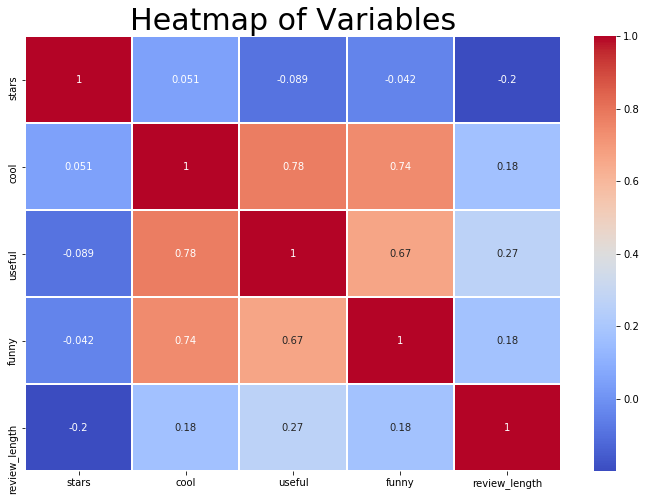

In [26]:
yelp_corr = df2[['stars', 'cool', 'useful', 'funny', 'review_length']].corr()

fig = plt.figure(figsize=(12,8))
axes = sns.heatmap(yelp_corr, cmap='coolwarm', linewidth=1, linecolor='white', annot=True)
axes.set_title('Heatmap of Variables', fontsize=30)

There is no strong correlation between review length and reviews voted as useful, so I will not be removing shorter reviews.

In [ ]:
# drop column headings for scatter matrix
df2.drop(columns=['name', 'city', 'text'], inplace=True)

In [10]:
df2.head(100)

,length,useful,stars,cool,funny
0,338,4,1,0,2
1,636,2,5,0,0
2,1041,4,2,4,1
3,798,3,1,0,3
4,215,1,4,2,0
...,...,...,...,...,...
95,1179,3,1,0,2
96,417,0,2,0,0
97,111,0,5,1,0
98,966,3,3,3,3


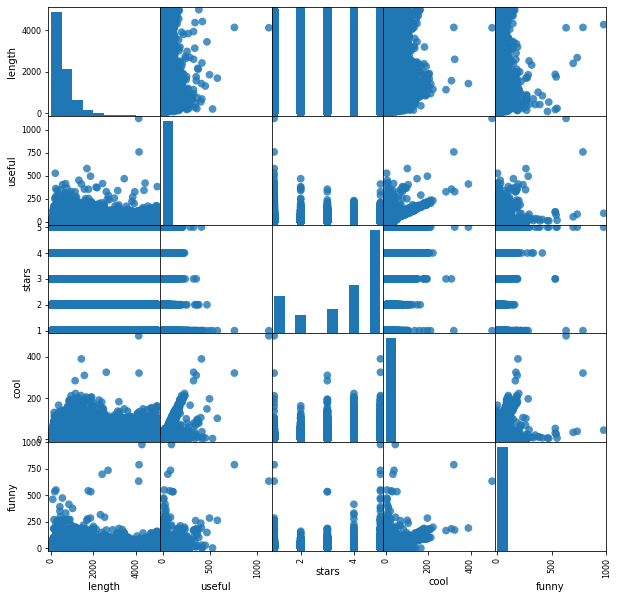

In [11]:
# Scatter matrix of correlations. Not strong correlations between variables. The next closest are between useful and cool.
g = pd.plotting.scatter_matrix(df2, figsize=(10,10), marker = 'o', hist_kwds = {'bins': 10}, s = 60, alpha = 0.8)

plt.show()

________________

____________________________

In [508]:
unique_businesses = Q('''SELECT DISTINCT(business_id) 
FROM yelp_reviews_filtered
''')

unique_businesses

,business_id
0,xoQwIZRWeZfR-W5d_ADlzw
1,FxqSR54O6m_HtgD18W8ciw
2,8yZ_nBgRC3CT1RFJC6KhXA
3,O9kHqO8XoiRGnhXt15O7ug
4,y0YoEY7JamQjTWju6OqjkQ
...,...
209388,OQCahoo8bCGMjMxucWUKyw
209389,mhplVRVIdr8kdkXD8OzpLA
209390,6vsGXE4BPhTJUKTOYUaHwA
209391,KMNDr5f2UwjxJbTHnidZ6w


In [543]:
# Unique business categories as chosen by businesses. However, it isn't specified enough.
unique_categories_of_business = Q('''SELECT DISTINCT(categories) 
FROM yelp_business
''')

unique_categories_of_business

,categories
0,"Shopping, Bookstores, Books, Mags, Music & Vid..."
1,"Beauty & Spas, Piercing, Watches, Local Servic..."
2,"Carpet Installation, Building Supplies, Home S..."
3,"Asian Fusion, Restaurants, Middle Eastern"
4,"Arts & Crafts, Shopping, Fashion, Fur Clothing..."
...,...
102490,"Shopping, Beauty & Spas, Cosmetics & Beauty Su..."
102491,"Burgers, Fast Food, Greek, Restaurants, Canadi..."
102492,"Beauty & Spas, Cosmetic Surgeons, Health & Med..."
102493,"Sports Bars, Restaurants, American (Traditiona..."


In [544]:
cat_of_business = Q('''SELECT categories
FROM yelp_business
''')

cat_of_business

,categories
0,"Canadian (New), Restaurants, Chicken Shop, Mid..."
1,"Mattresses, Home & Garden, Shopping, Electroni..."
2,"Auto Parts & Supplies, Automotive"
3,"Pizza, Chicken Wings, Restaurants, Seafood"
4,"Hair Salons, Hair Stylists, Makeup Artists, Da..."
...,...
209388,"Coffee & Tea, Chinese, Cafes, Taiwanese, Tea R..."
209389,"Delis, Restaurants, Sandwiches"
209390,"Automotive, Tires, Oil Change Stations, Auto R..."
209391,"Southern, Restaurants, Barbeque, Seafood"


In [554]:
restaurant_business = cat_of_business[cat_of_business['categories'].str.contains('Restaurants')]
restaurant_business

,categories
0,"Canadian (New), Restaurants, Chicken Shop, Mid..."
3,"Pizza, Chicken Wings, Restaurants, Seafood"
7,"Mediterranean, Middle Eastern, Restaurants"
16,"Bars, Nightlife, American (Traditional), Resta..."
19,Restaurants
...,...
209386,"Restaurants, Cafes, Coffee & Tea, Food"
209387,"Sandwiches, Sports Bars, Bars, Burgers, Nightl..."
209388,"Coffee & Tea, Chinese, Cafes, Taiwanese, Tea R..."
209389,"Delis, Restaurants, Sandwiches"


In [15]:
restaurant_business_reviews = business_review_count[business_review_count['categories'].str.contains('Restaurants')]
restaurant_business_reviews

,categories,review_count
0,"Sandwiches, Breakfast & Brunch, Food, Restaura...",10129
1,"Restaurants, French, Steakhouses, Food, Breakf...",9264
2,"Buffets, Breakfast & Brunch, Restaurants",7383
3,"Breakfast & Brunch, Restaurants, Food, America...",6751
4,"Burgers, Restaurants, American (Traditional)",5494
...,...,...
1732,"Nightlife, Sandwiches, Cocktail Bars, Bars, Re...",502
1733,"Vegan, Live/Raw Food, Restaurants, Vegetarian",502
1734,"Steakhouses, Nightlife, Seafood, Bars, Restaur...",501
1735,"Food, Restaurants, American (New), Desserts, M...",501


In [16]:
yelp_reviews_filtered = Q('''SELECT stars, useful, funny, cool
FROM yelp_reviews_filtered
LIMIT 10
''')

yelp_reviews_filtered

,stars,useful,funny,cool
0,5,1,1,0
1,2,1,2,0
2,5,1,0,0
3,3,2,1,0
4,5,0,0,0
5,4,0,0,0
6,4,1,2,1
7,5,1,0,0
8,5,0,0,0
9,5,1,0,0


In [18]:
yelp_reviews_filtered.corr()

,stars,useful,funny,cool
stars,1.000000,-0.398015,-0.721402,-0.099504
useful,-0.398015,1.000000,0.458333,0.111111
funny,-0.721402,0.458333,1.000000,0.583333
cool,-0.099504,0.111111,0.583333,1.000000


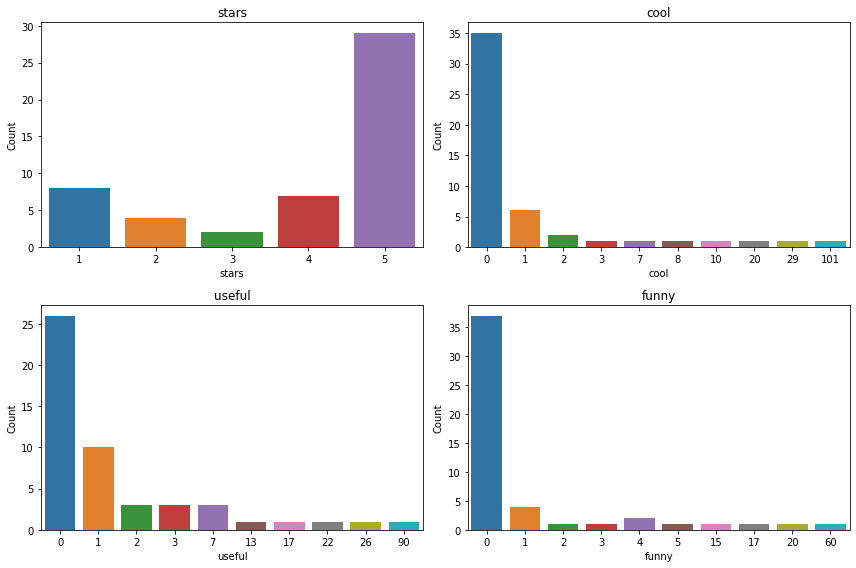

In [75]:
# Count plot, like a histogram but for categorical features. The star rating have a positive bias towards 5 star ratings.
# The rest of the ratings are quite skewed, althoguh useful ratings are the most balanced.
warnings.filterwarnings("ignore")

fig = plt.figure(figsize=(12,8))
axes1 = plt.subplot(2,2,1)
axes1 = sns.countplot(x='stars', data=yelp_reviews_filtered)
axes1.set_title('stars')
axes1.set_ylabel('Count')

axes2 = plt.subplot(2,2,2)
axes2 = sns.countplot(x='cool', data=yelp_reviews_filtered)
axes2.set_title('cool')
axes2.set_ylabel('Count')

axes3 = plt.subplot(2,2,3)
axes3 = sns.countplot(x='useful', data=yelp_reviews_filtered)
axes3.set_title('useful')
axes3.set_ylabel('Count')

axes4 = plt.subplot(2,2,4)
axes4 = sns.countplot(x='funny', data=yelp_reviews_filtered)
axes4.set_title('funny')
axes4.set_ylabel('Count')

plt.tight_layout()

In [6]:
business_review_city = Q('''SELECT city, COUNT(review_count)
FROM yelp_business
GROUP BY city
ORDER BY COUNT(review_count) DESC
LIMIT 10
''')

business_review_city

,city,count
0,Las Vegas,31631
1,Toronto,20366
2,Phoenix,20171
3,Charlotte,10422
4,Scottsdale,9342
5,Calgary,8377
6,Pittsburgh,7630
7,Montréal,6979
8,Mesa,6577
9,Henderson,5272


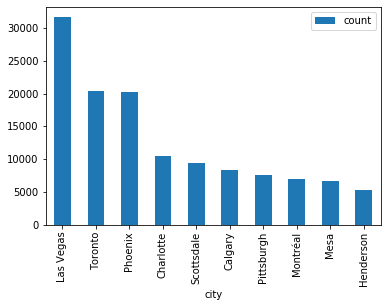

In [10]:
business_review_city.plot(kind='bar', x='city', y='count')

In [118]:
# Count how many funny reviews
useful_count = Q('''
SELECT COUNT(useful)
FROM reviews_join_table
WHERE useful > 0
''')

funny_useful

,count
0,1596224


## Sampling method

In [6]:
def get_sample(sample_size=100):
    query = '''
            with reviews_1 as (
            select useful, text
            from reviews_join_table TABLESAMPLE SYSTEM(50)
            where useful = 0
            limit ''' + str(sample_size) + '''
        )
        , reviews_2 as (
            select useful, text
            from reviews_join_table TABLESAMPLE SYSTEM(50)
            where useful > 0
            limit ''' + str(sample_size) + '''
        )
        select *
        from reviews_1
        union
        select *
        from reviews_2
        '''
    result = pd.read_sql(con=engine, sql=query)
    result['target'] = result.useful.apply(lambda x: 1 if x > 0 else 0)
    return result.copy()

In [7]:
result = get_sample(50000)

In [8]:
result

,useful,text,target
0,0,!!!! Beware !!!! THEY STEAL PHONES and your da...,0
1,0,!!!Buyer beware!!!\n\nTypical sales over promi...,0
2,0,"""A good bet for the relatively inexperienced b...",0
3,0,"""As good as it gets"" for a chain family restau...",0
4,0,"""Azucar!"" is a cuban interjection to express j...",0
...,...,...,...
99995,111,After getting some mags and dim sum (brunch) w...,1
99996,114,"The celebration of all things pink, glittery, ...",1
99997,137,You won't find any country bumpkins here! \n\n...,1
99998,155,I feel like they opened up a water park in my ...,1


In [9]:
result.target.value_counts()

1    50000
0    50000
Name: target, dtype: int64

In [10]:
result.target.unique()

array([0, 1])

In [11]:
result.drop(columns=['useful'], inplace=True)

In [12]:
#save to csv
result.to_csv('sample_result_capstone.csv')

In [77]:
result = pd.read_csv('sample_result_capstone.csv')

In [78]:
result.drop(columns=['Unnamed: 0'],inplace=True)

In [79]:
#Baseline
result.target.value_counts(normalize=True)

1    0.5
0    0.5
Name: target, dtype: float64